# Deep Learning Approach

## Imports

In [1]:
from sklearn.model_selection import train_test_split

from src.utils import load_config
from main import run_preprocessing_pipeline
from src.models import BinaryNeuralNetworkModel, MultilabelNeuralNetworkModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
config = load_config("just-load")

X, y = run_preprocessing_pipeline(config)
y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-10 23:01:07,469 - src.utils - INFO - Loading config from configs/just-load.yaml.
2025-03-10 23:01:07,476 - src.data_loader - INFO - Loading data with {'good_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/good.csv', 'promo_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-10 23:01:07,477 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-10 23:01:08,070 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-10 23:01:08,071 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-10 23:01:08,071 - src.preprocessing - INFO -

In [3]:
model = BinaryNeuralNetworkModel(X_train.shape[1])

In [4]:
model.fit(X_train, y_train, 0.001, 5, 16)

Epoch 1/5, Loss: 0.2652
Epoch 2/5, Loss: 0.0529
Epoch 3/5, Loss: 0.0127
Epoch 4/5, Loss: 0.0038
Epoch 5/5, Loss: 0.0020


In [5]:
predictions = model.predict(X_test)

2025-03-10 23:02:14,156 - src.evaluation - INFO - Evaluating the model.
2025-03-10 23:02:14,249 - src.evaluation - INFO - Accuracy: 98.50%
2025-03-10 23:02:14,263 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       199
           1       0.99      0.98      0.98       201

    accuracy                           0.98       400
   macro avg       0.99      0.99      0.98       400
weighted avg       0.99      0.98      0.98       400

2025-03-10 23:02:14,266 - src.evaluation - INFO - Confusion Matrix:
[[197   2]
 [  4 197]]
2025-03-10 23:02:14,381 - src.evaluation - INFO - Evaluation finished.


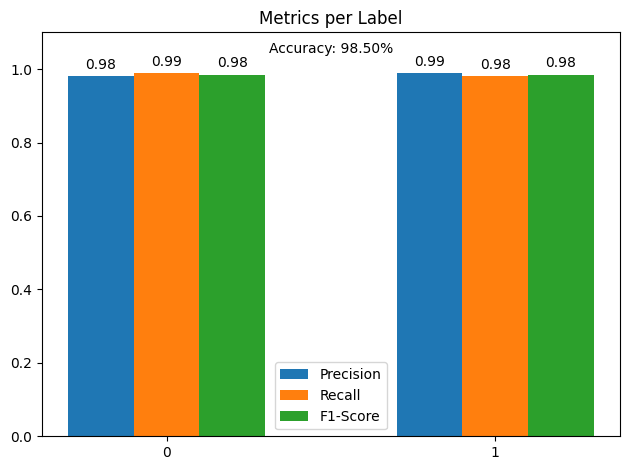

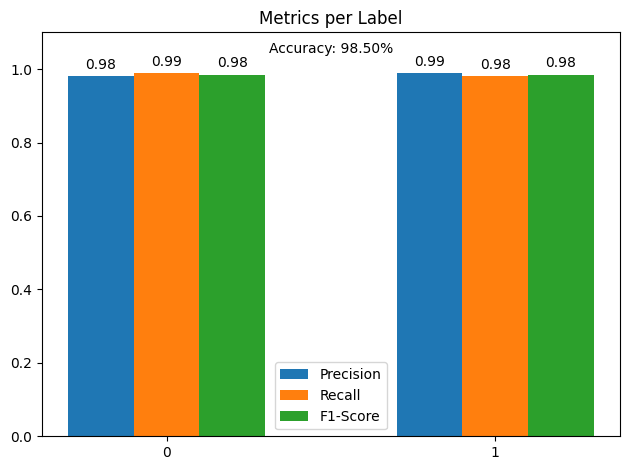

In [6]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [7]:
config = load_config("just-load2")

X, y = run_preprocessing_pipeline(config)
columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-10 23:02:14,806 - src.utils - INFO - Loading config from configs/just-load2.yaml.
2025-03-10 23:02:14,812 - src.data_loader - INFO - Loading data with {'good_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/good.csv', 'promo_file': '/Users/robinsuxdorf/Documents/Uni/FernUni Hagen/4. Semester/Projektpraktikum/github/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-10 23:02:14,813 - src.data_loader - INFO - Loading promotional data for multilabel classification.
2025-03-10 23:02:14,989 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-10 23:02:14,990 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-10 23:02:14,991 - src.preprocessing - INFO - Removing non-w

In [8]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [15]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

Epoch 1/5, Loss: 0.0006
Epoch 2/5, Loss: 0.0005
Epoch 3/5, Loss: 0.0003
Epoch 4/5, Loss: 0.0002
Epoch 5/5, Loss: 0.0001


In [16]:
predictions = model.predict(X_test)

2025-03-10 23:05:48,018 - src.evaluation - INFO - Evaluating the model.
2025-03-10 23:05:48,073 - src.evaluation - INFO - Accuracy: 72.00%
2025-03-10 23:05:48,087 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       158
           1       0.25      0.06      0.09        18
           2       1.00      0.33      0.50        12
           3       0.50      0.05      0.08        22
           4       0.60      0.30      0.40        10

   micro avg       0.83      0.73      0.78       220
   macro avg       0.64      0.34      0.40       220
weighted avg       0.76      0.73      0.71       220
 samples avg       0.80      0.77      0.77       220

2025-03-10 23:05:48,095 - src.evaluation - INFO - Confusion Matrix:
[[[ 15  27]
  [  6 152]]

 [[179   3]
  [ 17   1]]

 [[188   0]
  [  8   4]]

 [[177   1]
  [ 21   1]]

 [[188   2]
  [  7   3]]]
2025-03-10 23:05:48,264 - src.evaluation - INFO

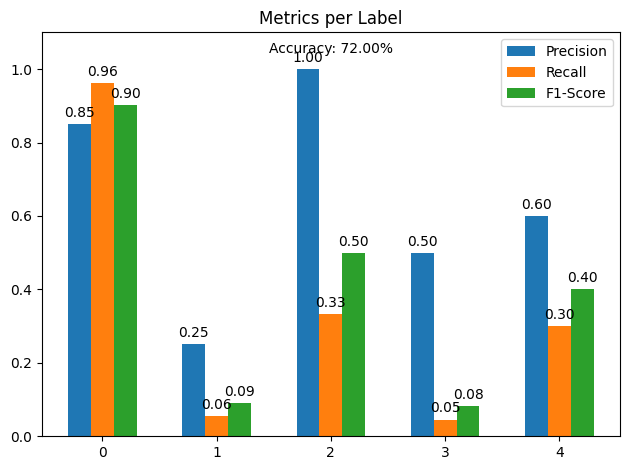

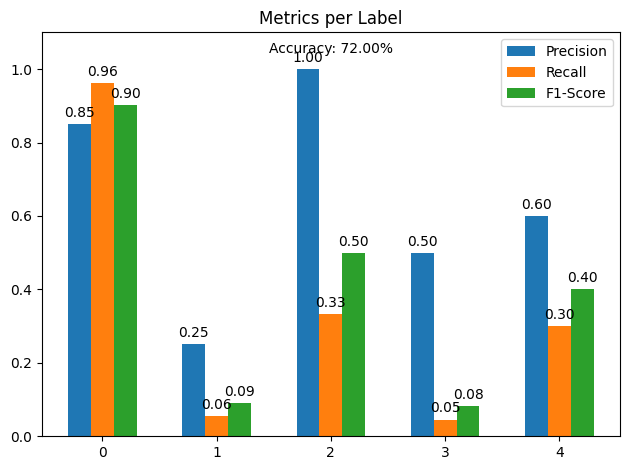

In [17]:
evaluate_model(model, X_test, y_test)